In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import pandas as pd
import technical_analysis.backtest_kz as bt
from data_pipelines.data_manipulation import DataManipulation
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action = 'ignore', category = pd.errors.PerformanceWarning)
%matplotlib inline

SYMBOL = 'BTC-USD'
scale = 1
range_list = [5, 10, 15, 20, 25, 30, 50, 99]
range_list = [i*scale for i in range_list]
period = 'max'
interval = '1d'
start_date = ''
end_data = ''
source = 'yahoo'

data = DataManipulation(SYMBOL, source, range_list, period=period, interval=interval, scale=scale, prefix_path='..', saved_to_csv=True)

In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.metrics as sk_metrics
import tempfile
import os

# Preset matplotlib figure sizes.
matplotlib.rcParams['figure.figsize'] = [9, 6]

print(tf.__version__)
# To make the results reproducible, set the random seed value.
tf.random.set_seed(22)

2.9.1


In [3]:
dataset = data.extract_features()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2392 entries, 2016-04-28 to 2022-11-14
Columns: 115 entries, st_hisse to log_return
dtypes: float64(71), int64(44)
memory usage: 2.1 MB


In [4]:
train_dataset = dataset.sample(frac=0.75, random_state=1)

In [5]:
len(train_dataset)

1794

In [6]:
test_dataset = dataset.drop(train_dataset.index)

In [7]:
len(test_dataset)

598

In [8]:
x_train, y_train = train_dataset.iloc[:, 2:], train_dataset.iloc[:, 1]
x_test, y_test = test_dataset.iloc[:, 2:], test_dataset.iloc[:, 1]

In [13]:
train_dataset.tail()

,st_hisse,st_stoch,st_fisher,st_ich,st_mfi,st_ema_5,st_ema_10,st_cut_ema_5_10,st_ema_15,st_ema_20,...,month,weekday,is_quarter_end,candle,vol_delta,lag_1,lag_2,lag_3,lag_4,log_return
Datetime,,,,,,,,,,,,,,,,,,,,,
2020-11-03,1.0000,1.0000,2.0000,1,2.0000,0.0181,0.0358,1,0.0553,0.0731,...,11,1,0,1.0000,-0.0293,0,0,1,1,0.0291
2016-08-19,0.0000,1.0000,2.0000,0,2.0000,0.0003,-0.0059,0,-0.0153,-0.0256,...,8,4,0,-1.0000,-0.1547,1,0,1,0,0.0023
2016-12-29,0.0000,0.0000,3.0000,1,3.0000,0.0313,0.0677,1,0.0942,0.1141,...,12,3,0,1.0000,-0.1577,1,1,1,0,-0.0025
2020-04-06,1.0000,1.0000,2.0000,1,2.0000,0.0497,0.0740,1,0.0836,0.0810,...,4,0,0,1.0000,0.5892,0,1,0,1,0.0684
2019-02-14,0.0000,0.0000,2.0000,0,2.0000,-0.0028,0.0041,1,0.0077,0.0079,...,2,3,0,-1.0000,-0.0261,0,1,0,1,-0.0042


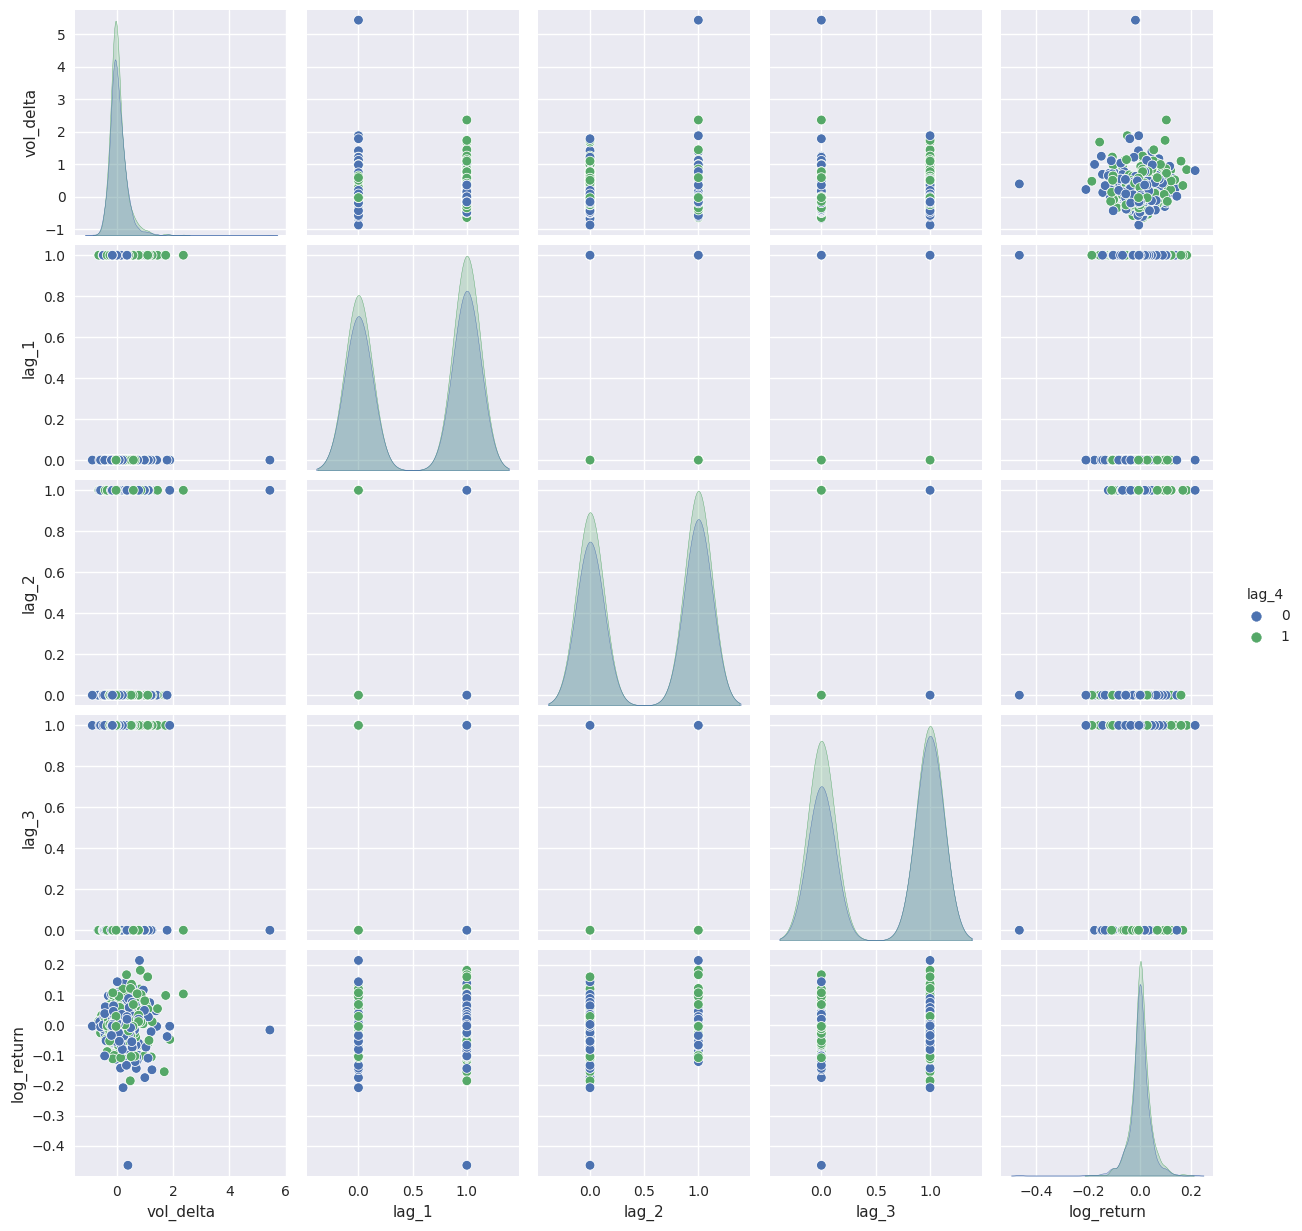

In [12]:
sns.pairplot(train_dataset.iloc[:, -6:], hue='lag_4', diag_kind='kde')